In [1]:
import numpy as np
import struct
from mnist import *
from matplotlib import pyplot as plt
import tensorflow as tf

/home/pavel/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

(55000, 784)
(55000, 10)


In [4]:
x_train = mnist.train.images
print ('x_train Examples Loaded = ' + str(x_train.shape))
y_train = mnist.train.labels
print ('y_train Examples Loaded = ' + str(y_train.shape))

x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)


In [5]:
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


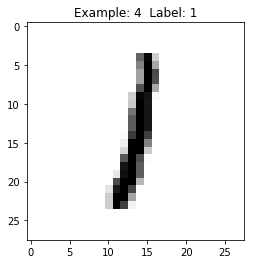

In [6]:
display_digit(4)

In [7]:
sess = tf.Session()

In [8]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

In [9]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [10]:
y_pred = tf.nn.softmax(tf.matmul(x, W) + b)
sess.run(tf.global_variables_initializer())
print(sess.run(tf.shape(y_pred), feed_dict={x: x_train}))
print(sess.run(y_pred, feed_dict={x: x_train}))

[55000    10]
[[0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 ...
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]
 [0.1 0.1 0.1 ... 0.1 0.1 0.1]]


In [11]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y*tf.log(y_pred), reduction_indices=[1]))

In [12]:
learning_rate = 0.3
train_steps = 1000
x_test = mnist.test.images
y_test = mnist.test.labels

In [13]:
init = tf.global_variables_initializer()
sess.run(init)
training = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [14]:
for i in range(train_steps+1):
    sess.run(training, feed_dict={x: x_train, y: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + 
              str(sess.run(accuracy, feed_dict={x: x_test, y: y_test})) + '  Loss = '
              + str(sess.run(cross_entropy, {x: x_train, y: y_train})))

Training Step:0  Accuracy =  0.6705  Loss = 2.0030613
Training Step:100  Accuracy =  0.8933  Loss = 0.44066754
Training Step:200  Accuracy =  0.9044  Loss = 0.38072467
Training Step:300  Accuracy =  0.9094  Loss = 0.354488
Training Step:400  Accuracy =  0.9126  Loss = 0.33877742
Training Step:500  Accuracy =  0.9147  Loss = 0.3279713
Training Step:600  Accuracy =  0.9162  Loss = 0.31993216
Training Step:700  Accuracy =  0.9173  Loss = 0.3136362
Training Step:800  Accuracy =  0.9185  Loss = 0.30852568
Training Step:900  Accuracy =  0.919  Loss = 0.30426311
Training Step:1000  Accuracy =  0.9192  Loss = 0.30063352
